In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rc('text', usetex=False)

file_name = r'ctfire_results_8-10-20.csv'
 

In [2]:
in_data = pd.read_csv(file_name) # read in the data, setting the eye (LE,RE) as the index
in_data.head()

,Eye,Region,ROI,Layer,Angle,Width,Length,Straightness
0,LE,INF,1,1,11.427102,5.824018,100.922496,0.950244
1,LE,INF,1,1,2.770216,3.725392,64.756064,0.958559
2,LE,INF,1,1,-4.085617,4.056749,44.351715,0.949388
3,LE,INF,1,1,9.352979,4.461051,95.590163,0.901193
4,LE,INF,1,1,11.944177,6.929453,54.996185,0.966444


In [3]:
in_data.describe()

,ROI,Layer,Angle,Width,Length,Straightness
count,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,1.935823,2.748368,0.539281,5.813641,64.785813,0.939183
std,0.955985,1.095605,40.977372,1.427017,83.892126,0.052887
min,1.000000,1.000000,-90.000000,2.529996,1.414214,0.517350
25%,1.000000,2.000000,-13.392498,4.758602,21.063196,0.918066
50%,2.000000,3.000000,0.000000,5.637815,34.229724,0.953674
75%,3.000000,4.000000,18.434949,6.612969,70.126696,0.975300
max,4.000000,4.000000,90.000000,12.877468,826.298391,1.000000


C:\ProgramData\Anaconda2\envs\py35_alt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


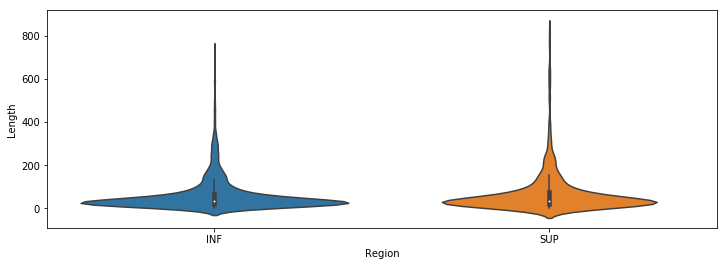

In [4]:
f, (ax) = plt.subplots(1,1,figsize=(12,4))
sns.violinplot(x="Region",y="Length",data=in_data,ax=ax)

In [5]:
in_data['Eye'] = in_data['Eye'].astype('category')

C:\ProgramData\Anaconda2\envs\py35_alt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


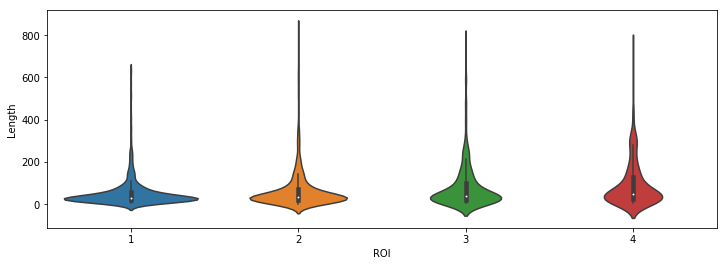

In [6]:
f, (ax) = plt.subplots(1,1,figsize=(12,4))
sns.violinplot(x="ROI",y="Length",data=in_data,ax=ax)

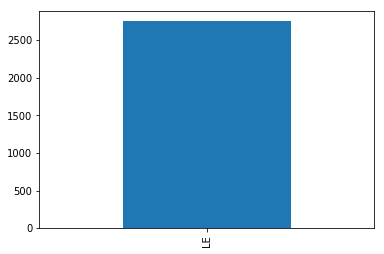

In [7]:
in_data['Eye'].value_counts().plot(kind='bar')

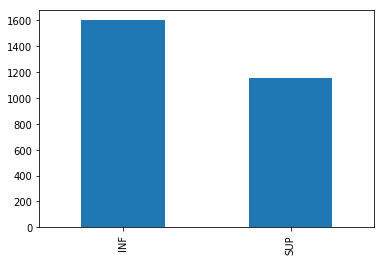

In [8]:
in_data['Region'].value_counts().plot(kind='bar')

In [44]:
# Want to compute the mean values of the four parameters per region, ROI, and layer
sub_data = in_data.groupby(['Region','ROI','Layer'],as_index=False).mean()
std_data = in_data.groupby(['Region','ROI','Layer'],as_index=False).std()
sub_data.head()

AttributeError: 'str' object has no attribute 'sqrt'

In [10]:
ss = sub_data.iloc[:,1:]
ss.head()

,ROI,Layer,Angle,Width,Length,Straightness
0,1,1,4.280487,6.193020,60.811577,0.937478
1,1,2,7.826979,5.971955,65.189206,0.935418
2,1,3,12.589270,6.119586,43.179645,0.922806
3,1,4,7.077141,5.714663,33.996661,0.927569
4,2,1,5.111771,5.609382,78.880081,0.952264


In [11]:
# Create smaller data frames that can be later pivoted. Do this for both mean and std versions
ld = ss[['ROI','Layer','Length']]
ad = ss[['ROI','Layer','Angle']]
wd = ss[['ROI','Layer','Width']]
sd = ss[['ROI','Layer','Straightness']]


In [46]:
ld.head()

,ROI,Layer,Length
0,1,1,60.811577
1,1,2,65.189206
2,1,3,43.179645
3,1,4,33.996661
4,2,1,78.880081


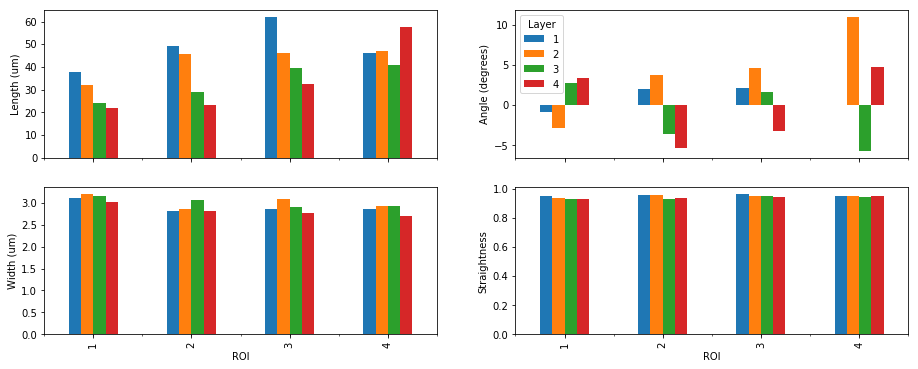

In [35]:
ldp = ld.pivot_table(index='ROI',columns='Layer',values='Length')
adp = ad.pivot_table(index='ROI',columns='Layer',values='Angle')
wdp = wd.pivot_table(index='ROI',columns='Layer',values='Width')
sdp = sd.pivot_table(index='ROI',columns='Layer',values='Straightness')

# Convert the values from pixels to um. For these images, the resolution is 0.512um/pixel
pix_to_um = 0.512
ldp.iloc[:] *= pix_to_um
wdp.iloc[:] *= pix_to_um

# And convert the angle from radians to degrees
#adp.iloc[:] *= 360.0/(2.0*np.pi)

gs = dict(left=0.1, right=0.9, bottom=0.05, top=0.95)
f, (ax) = plt.subplots(2,2,figsize=(15,5),sharex='all',gridspec_kw=gs)
ldp.plot.bar(ax=ax[0,0])
adp.plot.bar(ax=ax[0,1])
wdp.plot.bar(ax=ax[1,0])
sdp.plot.bar(ax=ax[1,1])

ax[0,0].set_ylabel(r'Length (um)')
ax[0,1].set_ylabel(r'Angle (degrees)')
ax[1,0].set_ylabel(r'Width (um)')
ax[1,1].set_ylabel(r'Straightness')

ax[0,0].get_legend().remove()
ax[1,0].get_legend().remove()
ax[1,1].get_legend().remove()

In [43]:
tt = sub_data.groupby(['Region'],as_index=False).mean()
tt.head()

,Region,ROI,Layer,Angle,Width,Length,Straightness
0,INF,2.5,2.5,3.597855,5.734747,71.755794,0.940566
1,SUP,2.0,2.5,-3.256883,5.792978,79.516454,0.947398
